In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive

0: 640x640 1 capacitor, 6 connectors, 10 integrated circuits, 1 oscillator, 1 processor, 1 transistor, 1761.8ms
Speed: 35.1ms preprocess, 1761.8ms inference, 37.5ms postprocess per image at shape (1, 3, 640, 640)
Composant integrated circuit: Centre en (623, 412)
Composant integrated circuit: Centre en (133, 590)
Composant integrated circuit: Centre en (616, 315)
Composant integrated circuit: Centre en (596, 591)
Composant integrated circuit: Centre en (285, 440)
Composant processor: Centre en (410, 372)
Composant oscillator: Centre en (500, 428)
Composant connector: Centre en (125, 339)
Composant connector: Centre en (838, 359)
Composant connector: Cent

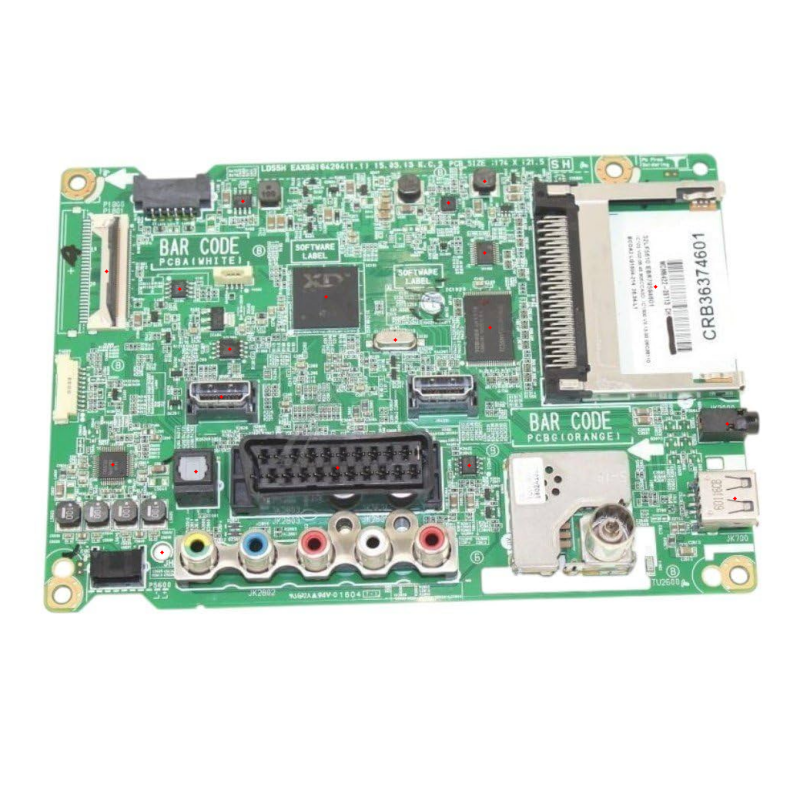

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
# Load the YOLOv11 model (you can choose another version if needed)
model = YOLO('/content/drive/MyDrive/Colab Notebooks/yolo11mv2.pt')

# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/test.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Perform detection
    results = model(image)

    # Extract bounding box coordinates
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Coordinates [x1, y1, x2, y2]
    classes = results[0].boxes.cls.cpu().numpy()  # Classes of detected objects


    # Display the center points of detected components
    for box, cls in zip(boxes, classes): # Removed confidences from zip
        x1, y1, x2, y2 = box
        # Calculate the center of the box
        center_x = int((x1 + x2) / 2)
        center_y = int((y1 + y2) / 2)
        print(f"Composant {model.names[int(cls)]}: Centre en ({center_x}, {center_y})")

        # Optional: Draw a point on the image
        cv2.circle(image, (center_x, center_y), 2, (0, 0, 255), -1) # Changed color to red (0, 0, 255)

    # Display using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
    plt.axis('off')
    plt.show()

    # Save the image with the points
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/resultat.jpg', image)